## K-Means Analysis - Diagnostics

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
# Load dataset and identify columns for scaling
df = pd.read_csv("synthetic_transit_data.csv")
df_num = df.drop(columns=["Trip_ID"])

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

EXPERIENCED COMPATABILITY ISSUES WITH yellowbrick IN THE DEFAULT ENVIRONMENT (PYTHON 3.12.x)

I.E. ONE OF ITS DEPENDENCIES (DISTUTILS) WAS NOT COMPATABLE WITH PYTHON 3.12.x 

UTILIZED PYENV TO INSTALL AND MAKE ACCESSIBLE, ADDITIONAL PYTHON VERSIONS (3.10.x).

CREATED A VIRTUAL ENVIRONMENT WITH PYTHON 3.10.x AND INSTALLED THE REQUIRED PACKAGES.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

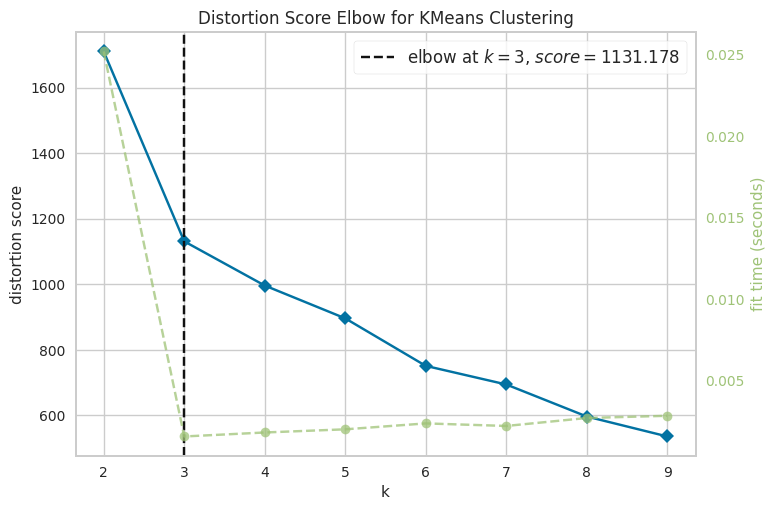

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
# Use Elbow method to determine optimal number of clusters (k)
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
# Instantiate the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
# Fit the data to the visualizer
visualizer.fit(df_scaled)
# Finalize and render the figure
visualizer.poof()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

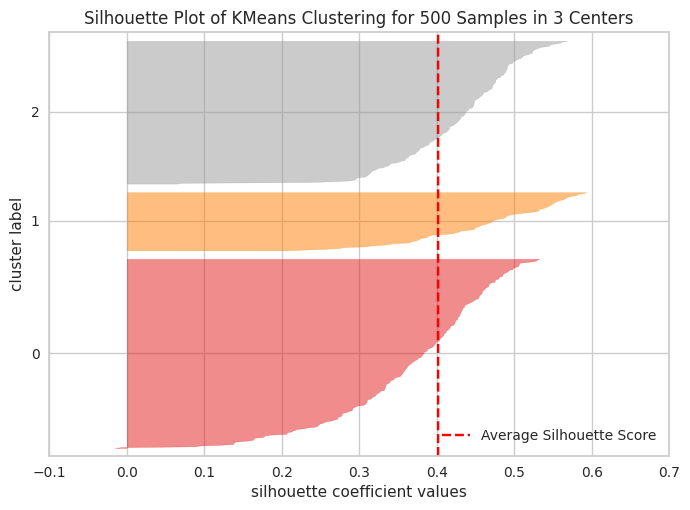

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 500 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [4]:
# Further evaluate the optimal number of clusters using Silhouette Analysis
from yellowbrick.cluster import SilhouetteVisualizer
# Create a KMeans instance with the suggested optimal number of clusters (i.e. 3)
model = KMeans(n_clusters=3, random_state=42)
# Create a SilhouetteVisualizer instance
visualizer = SilhouetteVisualizer(model)
# Fit the visualizer to the scaled data
visualizer.fit(df_scaled)
# Finalize and render the figure
visualizer.poof()

#### REVIEW OF INITIAL DIAGNOSTICS
The Elbow Method plot suggests that the optimal number of clusters (k) is 4 despite the synthetic data being generated with 3 intentional clusters that match the "business logic". 

This maybe indicative of an unintentional sub-cluster within one of the original clusters.

The Silhouette Analysis plot for k=3 shows that all samples have a positive silhouette score. 

A score above 0.4 is generally considered decent for real-world data. 

NEXT STEPS

1. Experiment with k=4 in the Silhouette Analysis to see if it improves the average silhouette score.

2. Use the KMeans model with the chosen k to fit the data and predict cluster assignments.

3. Analyze the characteristics of each cluster to understand their differences and similarities.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

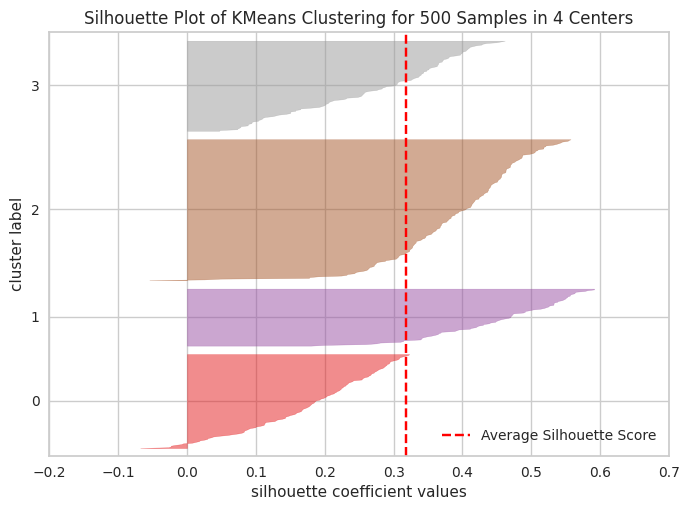

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 500 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [5]:
# Create a KMeans instance with 4 clusters
model = KMeans(n_clusters=4, random_state=42)
# Create a SilhouetteVisualizer instance
visualizer = SilhouetteVisualizer(model)
# Fit the visualizer to the scaled data
visualizer.fit(df_scaled)
# Finalize and render the figure
visualizer.poof()

The Silhouette Analysis for k=4 shows a siignificant decrease in the average score to approximately 0.34 from 0.42 (with k=3). 

This suggests that k=3 is a better choice for this dataset, aligning with the original data generation logic.

An intercluster distance map could be useful to further evaluate the cluster separation.

/workspaces/cluster_analysis/.venv2/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif

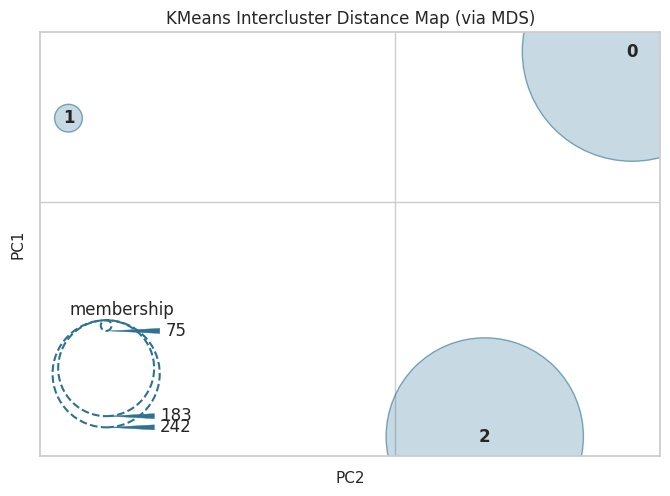

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [6]:
from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer for three clusters
visualizer = InterclusterDistance(KMeans(n_clusters=3, random_state=42))
# Fit the visualizer to the scaled data
visualizer.fit(df_scaled)
# Finalize and render the figure
visualizer.poof()

Reference the following for additional explanatory comments:

.../Continuing Education - Lite/Machine Learning Ops/2-DevOps_DataOps_MLOps/
MOD-2_Essential Maths and Data Science/3-Machine Learning and AI in Practice/15-Cluster_Analysis.ipynb

.../Continuing Education - Lite/Machine Learning Ops/PRACTICE_ADD READINGS/
WORKING WITH MULTIPLE PYTHON VERSIONS IN YOUR CODESPACE OR SERVER ENV